# Perform Sentiment Analysis using Naive Bayes Algorithm
        || Without Naive Bayes ML library ||

In [1]:
#importing necessary libraries 
import math 
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# NLP Libraries 
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Loading the Tweets Dataset from Kaggle (Learning Purpose)

In [3]:
# Load the dataset 
df = pd.read_csv("twitter_data.csv", encoding="latin")

# Perform Basic Pre-Processing and  Feature Engineering

In [4]:
# Information about dataset 
df.info()
print("\nPrinting the  first five rows of the dataset:")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
#Rename columns and reading dataset again
column_names = ['target','id','date','flag','user','text']
df= pd.read_csv('twitter_data.csv',names = column_names, encoding = 'latin')

# Printing the shape of dataset
print("Shape of the dataset is -")
df.shape

Shape of the dataset is -


(1600000, 6)

In [6]:
# Again checking the info of dataset 
df.info()
print("\nPrinting the  first five rows of the dataset:")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB

Printing the  first five rows of the dataset:


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
# Checking if any null values present or not 
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [8]:
#CONVERT TARGET 4 TO 1
df.replace({'target':{4:1}}, inplace=True)

# Again checking class distribution of target column
df['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [9]:
# dropping the rest of the column other than target and text 
df.drop(['id','date','flag','user'],axis=1,inplace=True)

# Again printing the dataset
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


# Taking the 1,00,000 Data/Tweets  from Original Dataset

In [11]:
# Now let split the dataset into smaller dataset 

# Creating a copy of dataframe df , named new_df which contains only 100000 examples

new_dataframe_class_0 = df[df['target'] == 0].head(50000)
new_dataframe_class_1 = df[df['target'] == 1].head(50000)

# Concatenate the two subsets to create the final DataFrame with equal counts of both classes
new_df = pd.concat([new_dataframe_class_0, new_dataframe_class_1])

# Shuffle the rows to randomize the order
new_df = new_df.sample(frac=1).reset_index(drop=True)

In [12]:
# Checking info about newly created dataset 
new_df.info()

print("\nPrinting some tweets of the dataset: ")
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  100000 non-null  int64 
 1   text    100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB

Printing some tweets of the dataset: 


,target,text
0,0,Three cheers for fiber to the home... now we o...
1,1,looking something new..
2,1,Up having QT - feeling better this morning as ...
3,0,Ugh. Riddler had his revenge on me....
4,0,@lauren42 hope Yall have fun without me tomorr...


# Step - 1

# Starting the Data Pre-processing part with the help of NLTK library
-> Here i exclude these set of words ['not', 'no', 'against', 'nor'] from stopword , because they contribute in learning

In [13]:
# Get the default NLTK stopwords list
default_stopwords = set(stopwords.words('english'))

# Add additional stopwords that you want to keep (e.g., negation words)
custom_stopwords = set(['not', 'no', 'against', 'nor'])

# Create a set that excludes words in custom_stopwords from default_stopwords
final_stopwords = default_stopwords - custom_stopwords

print(final_stopwords)


{'has', 'your', 'her', "didn't", 'had', 'were', 'the', 'some', 's', 'am', "mightn't", 'do', 'whom', 'my', 'most', 'and', 'than', 'myself', "doesn't", 'from', 'shouldn', 'have', 'with', 'where', 'further', 'own', "shouldn't", 'or', 'aren', 'being', 'hers', 'when', 'our', 'through', "haven't", "you've", "shan't", 'did', 'between', 'haven', "needn't", 'shan', 'theirs', 'been', 'until', 'she', 'them', 'needn', 'more', 'ourselves', 'off', 'y', 'his', 'who', 'at', 'once', 'doesn', 'its', 'didn', "it's", 'having', 'before', 'down', 'such', 'o', 'only', 'couldn', 'wasn', 'doing', 'below', 'over', 'hadn', "mustn't", 'which', 'both', "she's", 'few', 'so', 'him', 'weren', "weren't", 'he', 've', 'wouldn', "won't", 'i', 'themselves', 'an', 'should', 'itself', 'you', 'those', 'that', 'm', 'd', 'their', 'these', 'we', 'a', 'same', 'was', 'during', 'does', 'after', 'this', 'don', 'are', 'how', "couldn't", 'just', 'as', 'ours', 'they', 'yourself', 'to', 'it', 'mightn', 'into', "hasn't", 'ma', 'mustn', 

In [14]:
# Creates an instance of the PorterStemmer.
port_stem = PorterStemmer()

# Define the Stemming Function and perform operations 
def stemming(content):
    # Remove non-alphabetic characters using regular expression
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    
    # Convert to lowercase
    stemmed_content = stemmed_content.lower()
    
    # Tokenize the text into words
    stemmed_content = stemmed_content.split()
    
    # Apply stemming using Porter Stemmer, and exclude stopwords
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in final_stopwords]
    
    # Join the stemmed words into a single string
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

# Applies the stemming function to the 'text' column of the DataFrame and creates a new column 'stemmed_content' containing the preprocessed text.
new_df['stemmed_content'] = new_df['text'].apply(stemming)

In [15]:
# Again Printing the pre-processed data 
new_df.head()

,target,text,stemmed_content
0,0,Three cheers for fiber to the home... now we o...,three cheer fiber home wait year
1,1,looking something new..,look someth new
2,1,Up having QT - feeling better this morning as ...,qt feel better morn rememb god merci new everi...
3,0,Ugh. Riddler had his revenge on me....,ugh riddler reveng
4,0,@lauren42 hope Yall have fun without me tomorr...,lauren hope yall fun without tomorrow im jealo...


In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   target           100000 non-null  int64 
 1   text             100000 non-null  object
 2   stemmed_content  100000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


# Creating a word cloud of unique words in Positive and Neagative Tweets to analyze the occurance  of certain keywords.
-> Bigger the word means it occurs most frequently in that particular class

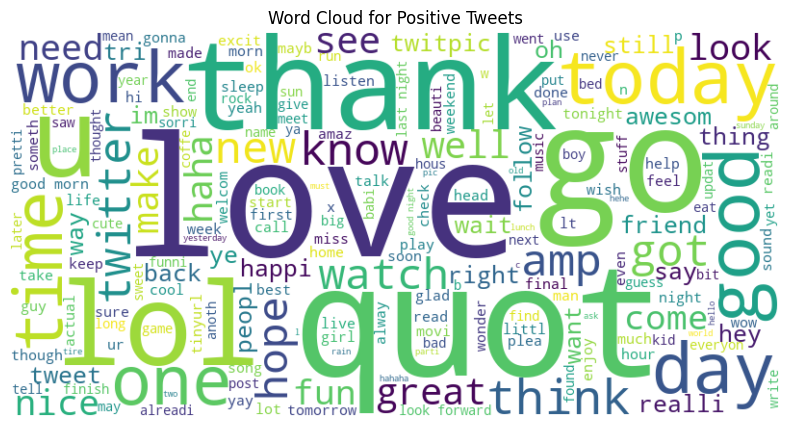

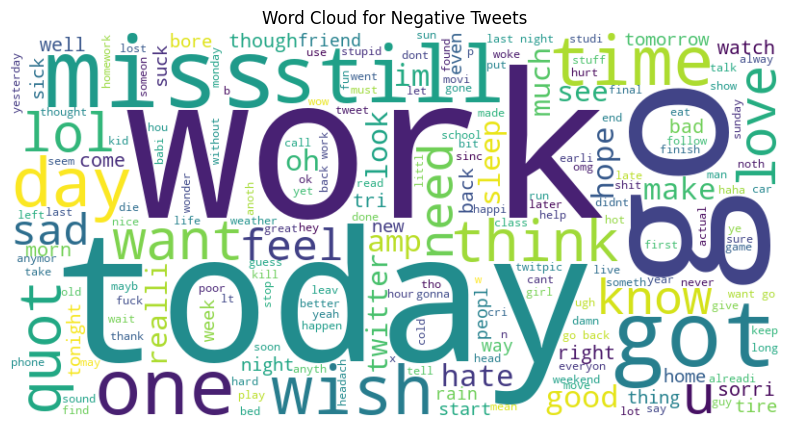

In [17]:
# Separate positive and negative tweets
positive_tweets = new_df[new_df['target'] == 1]
negative_tweets = new_df[new_df['target'] == 0]

# Function to generate and plot word clouds
def generate_word_cloud(data, sentiment):
    all_text = ' '.join(data['stemmed_content'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.axis('off')
    plt.show()

# Generate word clouds for positive and negative tweets
generate_word_cloud(positive_tweets, 'Positive')
generate_word_cloud(negative_tweets, 'Negative')


# Step - 2

# Creating a Frequency Table from the processed tweets dataset(which is done in above cell)
    -> Table contains three columns named - unique_word , positive , negative 

In [18]:
# Step 1: Create a list of all unique words
all_words = ' '.join(new_df['stemmed_content']).split()
unique_words = set(all_words)

# Step 2: Create an empty DataFrame to store word frequencies
word_freq_df = pd.DataFrame(columns=['unique_word', 'positive', 'negative'])

# Step 3: Count word frequencies for positive (target=1) and negative (target=0) labeled tweets
for word in unique_words:
    positive_count = sum((new_df['target'] == 1) & (new_df['stemmed_content'].str.contains(word)))
    negative_count = sum((new_df['target'] == 0) & (new_df['stemmed_content'].str.contains(word)))
    
    word_freq_df = pd.concat([word_freq_df, pd.DataFrame({'unique_word': [word], 'positive': [positive_count], 'negative': [negative_count]})])

# Optional: You can add a column for total frequency if needed
word_freq_df['total'] = word_freq_df['positive'] + word_freq_df['negative']

# Display the resulting DataFrame
print(word_freq_df.head())


     unique_word positive negative total
0  troyeatsbrain        0        1     1
0          worri      168      156   324
0            ozd        3        6     9
0         imagen        1        0     1
0        phadden        1        0     1


Count the total unique words in the whole dataset , sum of positive frequency , and sum of negative frequency

In [19]:
# Sum of values in the 'positive' and 'negative' columns
sum_positive = word_freq_df['positive'].sum()
sum_negative = word_freq_df['negative'].sum()

# Count of total unique words
total_unique_words = len(word_freq_df)

# Append a new row with sums and count to the last row of the DataFrame
word_freq_df.loc[len(word_freq_df)] = {'unique_word': 'Total', 'positive': sum_positive, 'negative': sum_negative, 'total': total_unique_words}


# Display the results
print(f"Sum of positive values: {sum_positive}")
print(f"Sum of negative values: {sum_negative}")
print(f"Count of total unique words: {total_unique_words}")


Sum of positive values: 3135912
Sum of negative values: 2986661
Count of total unique words: 71283


In [20]:
# Display the updated DataFrame
print(word_freq_df)

         unique_word positive negative  total
0      troyeatsbrain        0        1      1
0              worri      168      156    324
0                ozd        3        6      9
0             imagen        1        0      1
0            phadden        1        0      1
...              ...      ...      ...    ...
0               yuan        1        1      2
0               gahh        5       29     34
0        shuttergrac        1        0      1
0               coff      352      239    591
71283          Total  3135912  2986661  71283

[71284 rows x 4 columns]


# Performing the Laplace Smoothing (so that we do not come with  zero probabilities for any words to any class)

In [25]:
# Smoothing parameter (Laplacian smoothing)
alpha = 1

# Calculate conditional probabilities for each word
word_freq_df['P(w|pos)'] = (word_freq_df['positive'] + alpha) / (sum_positive +  total_unique_words)
word_freq_df['P(w|neg)'] = (word_freq_df['negative'] + alpha) / (sum_negative +  total_unique_words)

# Display the updated DataFrame with conditional probabilities
print(word_freq_df.head())


     unique_word positive negative total  P(w|pos)  P(w|neg)  lambda_score
0  troyeatsbrain        0        1     1       0.0  0.000001     -0.740801
0          worri      168      156   324  0.000053  0.000051      0.025999
0            ozd        3        6     9  0.000001  0.000002     -0.607270
0         imagen        1        0     1  0.000001       0.0      0.645493
0        phadden        1        0     1  0.000001       0.0      0.645493


# Step - 3

# Calculating lambda score (log Likelihood) for each unique words

In [26]:
# Laplacian smoothing function
def laplacian_smoothing(positive_freq, negative_freq, total_unique_words):
    smoothing_factor = 1  # Laplacian smoothing factor
    
    # Calculate conditional probabilities using Laplacian smoothing
    prob_pos = (positive_freq + smoothing_factor) / (sum_positive + total_unique_words)
    prob_neg = (negative_freq + smoothing_factor) / (sum_negative + total_unique_words)
    
    # Calculate probability ratio
    ratio_w = prob_pos / prob_neg
    
    # Compute lambda score
    lambda_w = np.log(ratio_w)
    
    return lambda_w

# Apply Laplacian smoothing and compute lambda score for each word
word_freq_df['lambda_score'] = word_freq_df.apply(
    lambda row: laplacian_smoothing(row['positive'], row['negative'], total_unique_words),
    axis=1
)

# Save the DataFrame to a CSV file
word_freq_df.to_csv('word_frequency.csv', index=False)

# Display the updated DataFrame with lambda scores
print(word_freq_df.head())


     unique_word positive negative total  P(w|pos)  P(w|neg)  lambda_score
0  troyeatsbrain        0        1     1       0.0  0.000001     -0.740801
0          worri      168      156   324  0.000053  0.000051      0.025999
0            ozd        3        6     9  0.000001  0.000002     -0.607270
0         imagen        1        0     1  0.000001       0.0      0.645493
0        phadden        1        0     1  0.000001       0.0      0.645493


# Step - 4 (Optional , if dataset is balanced)

# Compute the Log Prior ( it is important for unbalanced dataset , for balanced dataset its value is 0)

In [35]:
# Step 1: Count the number of positive and negative tweets
num_positive_tweets = sum(new_df['target'] == 1)
num_negative_tweets = sum(new_df['target'] == 0)

# Step 2: Calculate the ratio of positive to negative tweets
ratio_pos_neg = num_positive_tweets / num_negative_tweets

# Step 3: Calculate the log prior
log_prior = np.log(ratio_pos_neg)

# Step 4: Save the computed log prior value in a .txt file
with open('log_prior.txt', 'w') as file:
    file.write(str(log_prior))

# Display the results
print(f"Number of positive tweets: {num_positive_tweets}")
print(f"Number of negative tweets: {num_negative_tweets}")
print(f"Ratio of positive to negative tweets: {ratio_pos_neg}")
print(f"Log prior: {log_prior}")


Number of positive tweets: 50000
Number of negative tweets: 50000
Ratio of positive to negative tweets: 1.0
Log prior: 0.0


# Formulas in which we work and calculate the values in the above cells are : - 
 1.) Bayes Theorem -
        P(X|Y) = P(Y|X) × P(X)P(Y)

 2.) Laplace smoothing - 
        P(W_class) = freq(wi,class) + 1/ N_class + V

        ∏{ i=1 -> m } P(wi|pos) / P(wi|neg)

 3.) Log Likelihood - 
        ratio(wi) = P(wi|pos) / P(wi|neg)

        to prevent numerical underflow we use this instead of above  formula:
                log likelihood = λ(w) = log(w|pos) / log(w|neg)

 4.) Log Prior - 
        log prior = log(P(D_pos) / P(D_neg)) = log(D_pos)- log(D_neg)

 5.)  Final Formula - 
        p = log prior + ∑{i=1 -> N} log likelihood(w_i)

# Testing phase of Naive Bayes Model

-> Loading the word_frequency file into dataframe .
#
-> calulate log_prior 

In [ ]:
word_freq_df = pd.read_csv("word_frequency.csv")

# Step 1: Count the number of positive and negative tweets
num_positive_tweets = sum(new_df['target'] == 1)
num_negative_tweets = sum(new_df['target'] == 0)

# Step 2: Calculate the ratio of positive to negative tweets
ratio_pos_neg = num_positive_tweets / num_negative_tweets

# Step 3: Calculate the log prior
log_prior = np.log(ratio_pos_neg)

In [21]:

# Step 1: Preprocess the input tweet
def preprocess_input_tweet(input_tweet):
    # Apply the same preprocessing steps as the training data
    stemmed_input = stemming(input_tweet)
    return stemmed_input

# Step 2: Calculate log likelihood
def calculate_log_likelihood(stemmed_input, word_freq_df):
    # Split the input into words
    words = stemmed_input.split()

    # Initialize likelihoods
    log_likelihood_pos = 0
    log_likelihood_neg = 0

    # Iterate through words and calculate log likelihood
    for word in words:
        if word in word_freq_df['unique_word'].values:
            # Get the lambda score for the word
            lambda_w = word_freq_df.loc[word_freq_df['unique_word'] == word, 'lambda_score'].values[0]
            
            # Update log likelihoods
            log_likelihood_pos += lambda_w if lambda_w > 0 else 0
            log_likelihood_neg += -lambda_w if lambda_w < 0 else 0

    return log_likelihood_pos, log_likelihood_neg

# Step 3: Make predictions
def predict_sentiment(log_likelihood_pos, log_likelihood_neg, log_prior):
    # Calculate the final log likelihoods
    log_likelihood_pos += log_prior
    log_likelihood_neg += log_prior

    # Determine the predicted sentiment class
    predicted_class = 1 if log_likelihood_pos > log_likelihood_neg else 0

    return predicted_class

# Get input tweet from the user
input_tweet = input("Enter a tweet: ")

# Preprocess the input tweet
preprocessed_input = preprocess_input_tweet(input_tweet)

# Calculate log likelihoods
log_likelihood_pos, log_likelihood_neg = calculate_log_likelihood(preprocessed_input, word_freq_df)

# Make predictions
predicted_class = predict_sentiment(log_likelihood_pos, log_likelihood_neg, log_prior)

# Display the result
if predicted_class == 1:
    print("Positive sentiment!")
else:
    print("Negative sentiment!")


Negative sentiment!


# Checking Accuracy on unseen tweets

In [22]:
# Create a DataFrame with the remaining tweets for testing
remaining_tweets = df[~df.index.isin(new_df.index)].head(5000)

# Create a new column for predicted labels in the remaining_tweets DataFrame
remaining_tweets['predicted_target'] = remaining_tweets['text'].apply(lambda tweet: predict_sentiment(*calculate_log_likelihood(preprocess_input_tweet(tweet), word_freq_df), log_prior=log_prior))

# Calculate accuracy
accuracy = sum(remaining_tweets['target'] == remaining_tweets['predicted_target']) / len(remaining_tweets)

# Display the accuracy 
print(f"Accuracy on remaining tweets: {accuracy * 100:.2f}%")

Accuracy on remaining tweets: 80.78%


# Testing of saved model on User input tweet

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load the precomputed data and models
loaded_word_freq_df = pd.read_csv('word_frequency.csv')
# loaded_log_prior = log_prior
with open('log_prior.txt', 'r') as file:
        loaded_log_prior = float(file.read())

# Define the Stemming Function
def stemming(content):
    # Remove non-alphabetic characters using regular expression
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    
    # Convert to lowercase
    stemmed_content = stemmed_content.lower()
    
    # Tokenize the text into words
    stemmed_content = stemmed_content.split()
    
    # Apply stemming using Porter Stemmer, and exclude stopwords
    final_stopwords = set(stopwords.words('english')) - set(['not', 'no', 'against', 'nor'])
    port_stem = PorterStemmer()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in final_stopwords]
    
    # Join the stemmed words into a single string
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

# Define the log likelihood calculation function
def calculate_log_likelihood(stemmed_input):
    # Split the input into words
    words = stemmed_input.split()

    # Initialize likelihoods
    log_likelihood_pos = 0
    log_likelihood_neg = 0

    # Iterate through words and calculate log likelihood
    for word in words:
        if word in loaded_word_freq_df['unique_word'].values:
            # Get the lambda score for the word
            lambda_w = loaded_word_freq_df.loc[loaded_word_freq_df['unique_word'] == word, 'lambda_score'].values[0]

            # Update log likelihoods
            log_likelihood_pos += lambda_w if lambda_w > 0 else 0
            log_likelihood_neg += -lambda_w if lambda_w < 0 else 0

    return log_likelihood_pos, log_likelihood_neg

# Define the prediction function
def predict_sentiment(log_likelihood_pos, log_likelihood_neg):
    # Calculate the final log likelihoods
    log_likelihood_pos += loaded_log_prior
    log_likelihood_neg += loaded_log_prior

    # Determine the predicted sentiment class
    predicted_class = 1 if log_likelihood_pos > log_likelihood_neg else 0
    return predicted_class

# Input a new tweet
new_tweet = input("Enter the tweet: ")

# Preprocess the input tweet
preprocessed_tweet = stemming(new_tweet)

# Calculate log likelihood
log_likelihood_pos, log_likelihood_neg = calculate_log_likelihood(preprocessed_tweet)

# Make predictions
predicted_sentiment = predict_sentiment(log_likelihood_pos, log_likelihood_neg)

print("Your Entered Tweet : -",new_tweet)

# Display the result
if predicted_sentiment == 1:
    print("Positive sentiment!")
else:
    print("Negative sentiment!")



Your Entered Tweet : - He is so good and taking class regularly.
Positive sentiment!
